<font color="#006652" size="10">Projet data maining</font>


<font color="#006652" size="5">réaliser par:</font>
<font color="#e6005c" size="6">klahchi wiem</font>

<font size="5">Objectis</font>

l'objectif du ce projet est de metriser l’API de twitter pour l’extraction des tweets ainsi que
la bibliothéque NLP (natural language processing) avec NLTK en Python
ce projet nous permet d'appliquer les principes de nettoyage nos tweets. 


<font color="#e6005c" size="6">Partie 1: téléchargement des Tweets</font>
 
 Dans cette partie on a commencé par le téléchargement des Tweets à partir de Twitter en utilisant l’API de twitter
 
    • consumer_key
    • consumer_secret
    • access_token
    • access_token_secret


In [14]:
import pandas as pd
import tweepy as tw
import matplotlib.pyplot as plt

consumer_key = "Tippg04Ns8bfIZtE3uMprKEym" 
consumer_secret = "qHjBkD4CBX67rHPenKu96c7W5Tsv59t9BGBVsm0pXM0oLatOS8"
access_token= "1328070400136400905-ZOCtds4L0DD3LqMJ2r9rZHSyAi75Xu"
access_token_secret = "qX3pBBD42A1dAZDPXx2DGcH0T0hcr4e5Oxw40YwR9wTnc"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True, compression=True)

<font color="#4d4dff" size="4">cette cellule nous permet de telecharger 10000 tweets sous forme un fichier csv et on a marque le '#' pour que nous pouvons aoir tous les types de tweets.</font>

In [ ]:
search_words ='#'
date = "2020-11-14" # choose any date with the format "yyyy-mm-dd"
tab =[]
tweets = tw.Cursor(api.search,q=search_words,lang="en",since=date).items(10000)
for tweet in tweets:
    #print(tweet.id,tweet.user.screen_name,tweet.created_at,tweet.text,len(tweet.text))
    tab.append([tweet.id,tweet.user.screen_name,tweet.created_at,tweet.text,len(tweet.text)])
    df = pd.DataFrame(tab).to_csv('tweets',index=False,header=['ID','User','Date','Tweet','Len'])

<font color="#4d4dff" size="4">ici on va afficher notre fichier csv et le nombre des lignes et colonnes dans notres datasets</font>

In [2]:
df = pd.read_csv('tweets.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df.shape)
df.head(10)


shape  (8997, 1)


,text
0,There’s more! We’ll also be testing sharing Tw...
1,Oh snap! 👻\n\nSharing Tweets directly to your ...
2,@levantinepali a stamp of approval https://t.c...
3,2020 in one word
4,@Astro_AJC this is what cuffing season means t...
5,@un3asyy 2 is also cute
6,@DeePeeArts you're all amazing
7,RT @shesooosaddity: if you had a twitter befor...
8,@CloudNaii 40404
9,@issahairplug drink water replaced good morning



<font color="#4d4dff" size="4">on remarque que ona 8997 non null c est à dire qu on a pas des lignes manquants. </font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8997 entries, 0 to 8996
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8997 non-null   object
dtypes: object(1)
memory usage: 70.4+ KB



<font color="#e6005c" size="6">Partie 2: Prétraitement des tweets</font>



<font color="#4d4dff" size="4">Dans cette partie, on va éliminer le texte inutile des a l'aide de bibliothéque re tweets tels que les emoticons,symbols & pictographs,chinese char,mentions (@),hyperlinks ..</font>

In [4]:
import re
for index, row in df.iterrows():
    row = row['text']
    txt0 = re.sub(r"http\S+", "", row)
    txt1 = re.sub(r"#\S+", "", txt0)
    txt2 = re.sub(r"@\S+", "", txt1)
    txt3 = re.sub(r"\n+", "", txt2)
    txt4 = re.sub(r"RT+", "", txt3)
    txt5 = re.sub("hhh+", '', txt4)
    txt6 = re.sub('[0-9]+', '', txt5)
    txt7 = re.sub(r'https?:\/\/\S+', '', txt6) 
    txt8 = re.sub('@[A-Za-z0–9]+', '', txt7) 
    txt9 = re.sub(r'RT[\s]+', '', txt8) 
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    txt10 = re.sub(emoji_pattern, "", txt9)
    df.loc[index,'text'] =txt10

<font color="#4d4dff" size="5">notre cleaning datasets</font>

In [5]:
df.head(20)

,text
0,There’s more! We’ll also be testing sharing Tw...
1,Oh snap! Sharing Tweets directly to your Snapc...
2,a stamp of approval
3,in one word
4,this is what cuffing season means to us
5,is also cute
6,you're all amazing
7,if you had a twitter before rt this
8,
9,drink water replaced good morning


<font color="#e6005c" size="6">Partie 3: Traitement des tweets : NLP (Natural LanguageProcessing)
</font>

<font color="#00cccc" size="6">defintion:</font>

<font  size="4">Le traitement automatique du Langage Naturel est un des domaines de recherche les plus actifs en science des données actuellement.Il a pour but d’extraire des informations et une signification d’un contenu textuel.</font>

<font  size="4">
1.Tokenisation
    
2.Remove stopwords
    
3.Stemming and Lemmitization</font>

In [16]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\21650\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font color="#4d4dff" size="4">dans cette partie on a utulieser le stemmer de la bibliothéque nltk, dabord on va diviser chaque ligne de notre datasets en des mots et à l aide de stopwords et stemmer qui reduite les mots au mot racine.</font>

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,df.shape[0]):
    stemmed_array=df['text'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:10])

['there’ more! we’ll also test share tweet IG stori small % keep eye', 'Oh snap! share tweet directli snapchat stori easier ever. roll today ios!', 'stamp approv', 'one word', 'cuf season mean us', 'also cute', 'amaz', 'twitter rt', '', 'drink water replac good morn']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
nltk=cv.fit_transform(stemed_dataset)
print(nltk)

  (0, 2366)	1
  (0, 1516)	1
  (0, 2621)	1
  (0, 1362)	1
  (0, 68)	1
  (0, 2348)	1
  (0, 2070)	1
  (0, 2497)	1
  (0, 1169)	1
  (0, 2243)	1
  (0, 2132)	1
  (0, 1263)	1
  (0, 801)	1
  (1, 2070)	1
  (1, 2497)	1
  (1, 2243)	1
  (1, 1625)	1
  (1, 2142)	1
  (1, 637)	1
  (1, 2143)	1
  (1, 700)	1
  (1, 765)	1
  (1, 1958)	1
  (1, 2417)	1
  (1, 1214)	1
  :	:
  (8987, 2070)	1
  (8987, 2728)	1
  (8989, 992)	1
  (8989, 95)	1
  (8989, 385)	1
  (8990, 630)	1
  (8990, 2405)	1
  (8990, 1572)	1
  (8991, 2361)	1
  (8991, 2389)	1
  (8991, 1511)	1
  (8992, 2549)	1
  (8992, 2731)	1
  (8992, 1565)	1
  (8993, 2497)	1
  (8993, 2507)	2
  (8993, 2604)	2
  (8993, 2550)	1
  (8993, 1309)	1
  (8993, 2546)	2
  (8993, 224)	1
  (8993, 226)	1
  (8993, 2554)	1
  (8994, 2477)	1
  (8995, 865)	1



<font color="#e6005c" size="6">Partie 4: Classification des tweets
</font>

In [9]:
from sklearn.cluster import KMeans
wcss=[]

<font color="#4d4dff" size="4">on va utiliser l algorithme K-Means pour classer les Tweets en 1-30 classes smilaires</font> 

In [10]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(nltk)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration 0, inertia 57907.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 75863.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 58105.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 58303.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 57955.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 92545.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 31460.0
Iteration 1, inertia 31119.734355896333
Converged at iteration 1: strict convergence.
Initialization complete
Ite

Iteration 5, inertia 28825.10695420028
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 30415.0
Iteration 1, inertia 29892.68680856392
Iteration 2, inertia 29853.85114676366
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 47466.0
Iteration 1, inertia 30256.935321051944
Iteration 2, inertia 30160.107504335094
Iteration 3, inertia 30048.694248666827
Iteration 4, inertia 30044.85008387988
Iteration 5, inertia 30035.411484375436
Iteration 6, inertia 30028.818737787664
Iteration 7, inertia 30025.99180792095
Iteration 8, inertia 29882.4642577538
Iteration 9, inertia 29450.432186876933
Iteration 10, inertia 29376.58695316153
Iteration 11, inertia 29375.957625313706
Iteration 12, inertia 29375.7866928412
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 40261.0
Iteration 1, inertia 30827.022400551876
Iteration 2, inertia 30711.619076731993
Iteration 3, inertia 30107.55

Iteration 4, inertia 30227.28315537297
Iteration 5, inertia 29985.295601366965
Iteration 6, inertia 29648.492685085555
Iteration 7, inertia 29647.742546804035
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 38908.0
Iteration 1, inertia 29752.075385301952
Iteration 2, inertia 29724.041893616464
Iteration 3, inertia 29677.288480026808
Iteration 4, inertia 29315.991488321848
Iteration 5, inertia 29104.622580071922
Iteration 6, inertia 29103.30866349068
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 31178.0
Iteration 1, inertia 30485.75646494948
Iteration 2, inertia 30341.838815618263
Iteration 3, inertia 30301.453110560444
Iteration 4, inertia 30300.973055143077
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 31026.0
Iteration 1, inertia 29855.479095605435
Iteration 2, inertia 29542.493580681235
Iteration 3, inertia 29377.283443174532
Iteration 4, inertia 29332

Iteration 3, inertia 29059.90482287662
Iteration 4, inertia 29056.126581886558
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 39540.0
Iteration 1, inertia 29801.824506444398
Iteration 2, inertia 29637.362357334758
Iteration 3, inertia 29403.91731097644
Iteration 4, inertia 29295.467054986097
Iteration 5, inertia 29290.857462166732
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 38651.0
Iteration 1, inertia 28977.945593728495
Iteration 2, inertia 28665.820372182963
Iteration 3, inertia 28553.024598586693
Iteration 4, inertia 28552.935837239384
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 30167.0
Iteration 1, inertia 29469.238883228314
Iteration 2, inertia 28786.173799950302
Iteration 3, inertia 28567.310876382275
Iteration 4, inertia 28561.204406172248
Iteration 5, inertia 28560.704069329022
Converged at iteration 5: strict convergence.
Initialization comp

Iteration 1, inertia 28913.970433692848
Iteration 2, inertia 28420.18253856177
Iteration 3, inertia 28363.694514993145
Iteration 4, inertia 28361.129089702463
Iteration 5, inertia 28360.94830311678
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 38431.0
Iteration 1, inertia 28702.468988827743
Iteration 2, inertia 28674.629110038655
Iteration 3, inertia 28659.179244881
Iteration 4, inertia 28655.400657384656
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 38441.0
Iteration 1, inertia 29087.41263747846
Iteration 2, inertia 28867.746114147183
Iteration 3, inertia 28580.763750001915
Iteration 4, inertia 28345.403648743686
Iteration 5, inertia 28344.77394984403
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 30105.0
Iteration 1, inertia 28901.82561904363
Iteration 2, inertia 28485.340782976305
Iteration 3, inertia 28304.28578312736
Iteration 4, inertia 28302.76814

Iteration 0, inertia 29712.0
Iteration 1, inertia 29090.92828310272
Iteration 2, inertia 28969.08672246027
Iteration 3, inertia 28827.182890837325
Iteration 4, inertia 28656.7540756197
Iteration 5, inertia 28617.03434903294
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 36271.0
Iteration 1, inertia 27588.042549589216
Iteration 2, inertia 27299.640973546564
Iteration 3, inertia 27242.37098487994
Iteration 4, inertia 27240.477939301338
Iteration 5, inertia 27240.19306772899
Iteration 6, inertia 27239.443425668287
Iteration 7, inertia 27238.89769960871
Iteration 8, inertia 27237.069476879147
Iteration 9, inertia 27236.556891431836
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 29770.0
Iteration 1, inertia 28730.164082313408
Iteration 2, inertia 28435.478119174477
Iteration 3, inertia 28434.92621150117
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 36960.0
Ite

Iteration 3, inertia 27403.187687835933
Iteration 4, inertia 27401.064249527026
Iteration 5, inertia 27399.601438592035
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 37396.0
Iteration 1, inertia 28083.854549184354
Iteration 2, inertia 27570.293059131534
Iteration 3, inertia 27423.670903506136
Iteration 4, inertia 27409.62033892494
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 29426.0
Iteration 1, inertia 28759.334106361446
Iteration 2, inertia 28556.570706283987
Iteration 3, inertia 27979.355482865645
Iteration 4, inertia 27793.800040901475
Iteration 5, inertia 27678.149386568624
Iteration 6, inertia 27573.4816326667
Iteration 7, inertia 27554.520048069196
Iteration 8, inertia 27554.277734015275
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 29092.0
Iteration 1, inertia 27879.196663327995
Iteration 2, inertia 27266.56312256886
Iteration 3, inertia 27086.

Iteration 1, inertia 27459.578235267258
Iteration 2, inertia 27214.324042082713
Iteration 3, inertia 26814.16446847734
Iteration 4, inertia 26740.859298101754
Iteration 5, inertia 26740.74390384787
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 29681.0
Iteration 1, inertia 28059.858519947873
Iteration 2, inertia 27904.75806084712
Iteration 3, inertia 27572.507460494428
Iteration 4, inertia 27450.213807685584
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 29339.0
Iteration 1, inertia 28712.768030396182
Iteration 2, inertia 28135.043581540296
Iteration 3, inertia 27902.7359394933
Iteration 4, inertia 27726.52296564801
Iteration 5, inertia 27689.773600781453
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 29416.0
Iteration 1, inertia 28287.67182824343
Iteration 2, inertia 27691.105979886066
Iteration 3, inertia 27555.398175135888
Iteration 4, inertia 27548.889

Iteration 0, inertia 28853.0
Iteration 1, inertia 27619.275244976125
Iteration 2, inertia 26995.09781533627
Iteration 3, inertia 26813.423145037093
Iteration 4, inertia 26699.714183323973
Iteration 5, inertia 26606.794453897335
Iteration 6, inertia 26603.458384070465
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 29339.0
Iteration 1, inertia 28546.63194409892
Iteration 2, inertia 28213.25881411391
Iteration 3, inertia 27876.55060705759
Iteration 4, inertia 27306.127234110827
Iteration 5, inertia 27128.261098010218
Iteration 6, inertia 27055.547350201745
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 28910.0
Iteration 1, inertia 28255.262475584255
Iteration 2, inertia 27896.43426607321
Iteration 3, inertia 27317.993758785527
Iteration 4, inertia 26900.854756729983
Iteration 5, inertia 26614.121017030262
Iteration 6, inertia 26612.073386416956
Converged at iteration 6: strict convergence.
Initializati

Initialization complete
Iteration 0, inertia 29133.0
Iteration 1, inertia 28031.3042833061
Iteration 2, inertia 27445.22609124049
Iteration 3, inertia 27309.41461817984
Iteration 4, inertia 27300.30463886036
Iteration 5, inertia 27212.978539305986
Iteration 6, inertia 27107.088170798612
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 28343.0
Iteration 1, inertia 27027.971757330295
Iteration 2, inertia 26857.27657936062
Iteration 3, inertia 26851.43555151956
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 29290.0
Iteration 1, inertia 27861.882212211276
Iteration 2, inertia 27238.81621236879
Iteration 3, inertia 27024.688063353486
Iteration 4, inertia 26995.508641878932
Iteration 5, inertia 26992.566289324484
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 28908.0
Iteration 1, inertia 28220.98828531097
Iteration 2, inertia 27920.0112474112
Iteration 3, inertia 

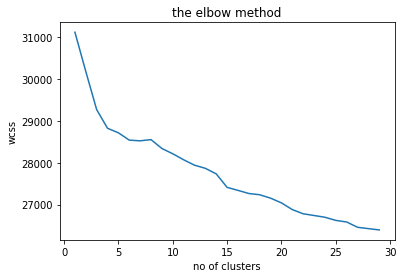

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(nltk)

KMeans(n_clusters=30, n_init=1)

<font color="#4d4dff" size="4">l'afficher des différents clustering</font> 

In [13]:
print("Top terms per cluster:") 
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
 close
 home
 hit
 some
 ᵗᶦⁿʸ
 frank
 french
 fren
 freestylin
 freeeezi

Cluster 1:
 tweet
 one
 thi
 good
 the
 us
 gt
 like
 you
 new

Cluster 2:
 summer
 calculations
 happi
 fri
 fresh
 french
 fren
 freestylin
 freeeezi
 freedom

Cluster 3:
 peopl
 amp
 get
 we
 you
 us
 five
 convers
 stop
 the

Cluster 4:
 check
 dms
 da
 ta
 ᵗᶦⁿʸ
 four
 freestylin
 freeeezi
 freedom
 free

Cluster 5:
 follow
 you
 us
 love
 gratitude
 share
 we
 dm
 much
 do

Cluster 6:
 good
 outlook
 morn
 what
 news
 look
 new
 he
 thank
 know

Cluster 7:
 true
 power
 there
 we
 fan
 come
 sksksksk
 slide
 it
 curat

Cluster 8:
 think
 the
 that
 retweet
 hey
 morn
 could
 mummi
 vendetta
 move

Cluster 9:
 love
 we
 tweet
 see
 it
 share
 us
 for
 make
 timelin

Cluster 10:
 bend
 close
 leg
 could
 like
 build
 hi
 face
 case
 free

Cluster 11:
 emoji
 found
 just
 use
 shooketh
 tri
 gif
 from
 twitter
 know

Cluster 12:
 get
 ring
 whi
 retweet
 fourth
 fren
 freestyli

In [3]:
!pip install watermark


  Using cached watermark-2.1.0-py2.py3-none-any.whl (5.7 kB)


In [10]:
%load_ext watermark
%watermark -v -m -p tweepy,nltk,re,scikit-learn
print("")


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.18.1

tweepy      : 3.9.0
nltk        : 3.5
re          : 2.2.1
scikit-learn: 0.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit


